- - -

Estudiante: Luis A, Ramirez G.<br>
GitHub: ramirezla<br>
Email: ramirezluisalberto@hotmail.com<br>
Email: ramirezgluisalberto@gmail.com<br>

Versiones paquetes utilizados: <br>
OS: Linux x64 3.10.0-1160.92.1.el7.x8_64<br>
Visual Studio Code 1.80.1<br>
Python 3.6.8<br>
fastapi             0.83.0<br>
pip                 21.3.1<br>
matplotlib          3.3.4<br>
numpy               1.19.5<br>
pandas              1.1.5<br>
pip                 21.3.1<br>
seaborn             0.11.2<br>
sklearn             0.0.post1<br>
uvicorn             0.16.0<br>

- - - 

# <h1 align=center> **PROYECTO INDIVIDUAL Nº1** </h1>

# <h1 align=center>**`Machine Learning Operations (MLOps)`**</h1>

- - -

**`Transformaciones`**:

+ Algunos campos, como **`belongs_to_collection`**, **`production_companies`** y otros (ver diccionario de datos) están anidados, esto es o bien tienen un diccionario o una lista como valores en cada fila, ¡deberán desanidarlos para poder  y unirlos al dataset de nuevo hacer alguna de las consultas de la API! O bien buscar la manera de acceder a esos datos sin desanidarlos.

+ Los valores nulos de los campos **`revenue`**, **`budget`** deben ser rellenados por el número **`0`**.
  
+ Los valores nulos del campo **`release date`** deben eliminarse.

+ De haber fechas, deberán tener el formato **`AAAA-mm-dd`**, además deberán crear la columna **`release_year`** donde extraerán el año de la fecha de estreno.

+ Crear la columna con el retorno de inversión, llamada **`return`** con los campos **`revenue`** y **`budget`**, dividiendo estas dos últimas **`revenue / budget`**, cuando no hay datos disponibles para calcularlo, deberá tomar el valor **`0`**.

+ Eliminar las columnas que no serán utilizadas, **`video`**,**`imdb_id`**,**`adult`**,**`original_title`**,**`poster_path`** y **`homepage`**.

<br/>

**`Archivos con los datos`**:

+ [credits.csv](./Datasets/credits.csv)
+ [movies_dataset.csv](./Datasets/movies_dataset.csv)

**`Diccionario de Datos movies_dataset`**:

| Característica | Descripción |
| --------- | --------- |
| adult	| Indica si la película tiene califiación X, exclusiva para adultos. |
| belongs_to_collection	| Un diccionario que indica a que franquicia o serie de películas pertenece la película |
| budget | El presupuesto de la película, en dólares |
| genres | Un diccionario que indica todos los géneros asociados a la película |
| homepage | La página web oficial de la película |
| id | ID de la pelicula |
| imdb_id | IMDB ID de la pelicula |
| original_language	| Idioma original en la que se grabo la pelicula |
| original_title | Titulo original de la pelicula |
| overview | Pequeño resumen de la película |
| popularity | Puntaje de popularidad de la película, asignado por TMDB (TheMoviesDataBase) |
| poster_path | URL del póster de la película |
| production_companies | Lista con las compañias productoras asociadas a la película |
| production_countries | Lista con los países donde se produjo la película |
| release_date | Fecha de estreno de la película |
| revenue | Recaudación de la pelicula, en dolares |
| runtime | Duración de la película, en minutos |
| spoken_languages | Lista con los idiomas que se hablan en la pelicula |
| status | Estado de la pelicula actual (si fue anunciada, si ya se estreno, etc) |
| tagline | Frase celebre asociadaa la pelicula |
| title | Titulo de la pelicula |
| video | Indica si hay o no un trailer en video disponible en TMDB |
| vote_average | Puntaje promedio de reseñas de la pelicula |
| vote_count | Numeros de votos recibidos por la pelicula, en TMDB |


**`Diccionario de Datos credits`**:

- Cast and Crew<br>

| - - - | `Cast` | - - - |
| --------- | --------- | --------- |
| `Característica` | `Descripción` | `Util` |
| cast_id	| id del personaje | No |
| character	| Nombre del personaje | Si |
| credit_id | id de los creditos | No |
| gender | Genero | No |
| id | id del Actor | No |
| name | Nombre del actor | Si |
| order |  | No |
| profile_path | Curriculum del actor | No |
| - - - | `Crew` | - - - |
| `Característica` | `Descripción` | `Util` |
| credit_id	| id de los creditos | No |
| department | Nombre del departamento: Directing, Sound, Writing, Camera, Production | Si |
| gender | Genero | No |
| id | id del cargo | No |
| job | Nombre del cargo: Director, Original Music Composer, Screenplay, Director of Photography, Producer, Executive Producer, Writer, Costume Design, Casting | Si |
| name | Nombre del trabajor | Si |
| profile_path | Curriculum del trabajador | No |

- - -

**`Librerias`**

Se importan las librerias necesarias para realizar la limpieza de los datos.

- Libreria para importar y manipular los datos: <br>
**`import pandas as pd`** <br>
**`import numpy as np`** <br>
**`import ast`** <br>
**`import math`** <br>

- Librerias para graficar y entender las caracteristicas y comportamiento de los datos: <br>
**`import matplotlib.pyplot as plt`** <br>
**`import seaborn as sns`**

In [2]:
import pandas as pd
import numpy as np
import ast
import math

import matplotlib.pyplot as plt
import seaborn as sns

- - - 

1.- **`Se importan los datos desde el dataset: movies_dataset.csv`**.



Se trata de entender o hacerse una idea general de los datos, observando las caracteristicas especiales de cada registro del set de datos.

In [3]:
ruta_archivo = "./Datasets/movies_dataset.csv"
df_movies = pd.read_csv(ruta_archivo)

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Se muestra la cabecera para observar parte de los datos y las columnas

df_movies.head().T

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,30000000,65000000,0,16000000,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


In [5]:
# Se verifica la cantidad de columnas y filas

df_movies.shape

(45466, 24)

In [6]:
# Se muestra la informacion de los datos que se tienen, buscando los datos que son y/o deberian ser numéricos
# y los categóricos.
# Tambien se pueden ver de la cantidad de datos, si se tienen datos nulos o vacios.

# Los datos numéricos son datos de tipo: float65, int64
# Los datos categóricos son datos de tipo: object

df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

**`Información visual del set de datos:`**

- Se tiene un total de 45466 filas y 24 columnas
- budget: Se muestra como typo objeto y es numerico ya que almacena el presupuesto de la película, en dólares.
Se colocara el valor de 0 (cero) para los datos faltantes, nulos o vacios.
- Se tienen columnas con una significativa cantidad de datos faltantes, nulos o vacios.
    - belongs_to_collection
    - homepage
    - tagline
- Se tienen datos que estan compuestos por un diccionario o por una lista de diccionarios, estos datos deben ser separados para su facil manipulacion:
    - belongs_to_collection: Indica a que franquicia o serie de películas pertenece la película.
    - genres: Un diccionario que indica todos los géneros asociados a la película.
    - production_companies: Lista con las compañias productoras asociadas a la película.
    - production_countries: Lista con los países donde se produjo la película.
    - spoken_languages: Lista con los idiomas que se hablan en la pelicula.

- - - 

2.- **`Transformaciones`**.

**`Trabajando con los Datos Numéricos`**.

- budget
- revenue
- runtime
- vote_average
- vote_count

**budget**

Se verifica la columna 'budget, ya que debe tener un valor no mumérico.<br>
Cambiar el tipo de dato de cadena a numérico en el campo budget<br>
Se tienen datos como: "/ff9qCepilowshEtG2GYWwzt2bs4.jpg"<br>

In [7]:
# Se cambian cualquier valor que no sea numerico de la columna 'budget' por NaN
df_movies['budget'] = pd.to_numeric(df_movies['budget'], errors='coerce')

# se cambian los valores NaN por 0 (cero)
df_movies['budget'] = df_movies['budget'].fillna(0)

# Se cambia el tipo de datos a float64
df_movies['budget'] = df_movies['budget'].astype('float64')

**revenue**

In [8]:
# se cambian los valores NaN por 0 (cero)
df_movies['revenue'] = df_movies['revenue'].fillna(0)

**runtime**

In [9]:
# se cambian los valores NaN por 0 (cero)
df_movies['runtime'] = df_movies['runtime'].fillna(0)

**vote_average**

In [10]:
# se cambian los valores NaN por 0 (cero)
df_movies['vote_average'] = df_movies['vote_average'].fillna(0)

**vote_count**

In [11]:
# se cambian los valores NaN por 0 (cero)
df_movies['vote_count'] = df_movies['vote_count'].fillna(0)

In [12]:
# Se muestra la descripcion de los datos numericos
df_movies.describe()

,budget,revenue,runtime,vote_average,vote_count
count,4.546600e+04,4.546600e+04,45466.000000,45466.000000,45466.000000
mean,4.224300e+06,1.120787e+07,93.583711,5.617466,109.882836
std,1.742359e+07,6.432813e+07,38.956167,1.925171,491.279576
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,34.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000


In [13]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  float64
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

Se tiene todos los datos numericos iniciales en tipos numericos (float54):

- budget
- revenue
- runtime
- vote_average
- vote_count

Cuando la std muestra que es diferente de 0, indica que tiene valores diferentes, entonces pareciera que esta bien.

**`Trabajando con los Datos Categóricos`**.

**Datos tipo diccionario y listas**.

- belongs_to_collection: Diccionario que indica a que franquicia o serie de películas pertenece la película.<br>
- genres: Diccionario que indica todos los géneros asociados a la película.<br>
- production_companies: Lista con las compañias productoras asociadas a la película.<br>
- production_countries: Lista con los países donde se produjo la película.<br>
- spoken_languages: Lista con los idiomas que se hablan en la pelicula.<br>

- - -

In [14]:
# Se separan en 2 dataframe nuevos, las variables categoricas.

df_categoricas = df_movies.select_dtypes(include=['object', 'category'])
df_numericas = df_movies.select_dtypes(include='number')

df_categoricas.head(2).T

,0,1
adult,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '..."
homepage,http://toystory.disney.com/toy-story,NaN
id,862,8844
imdb_id,tt0114709,tt0113497
original_language,en,en
original_title,Toy Story,Jumanji
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...
popularity,21.9469,17.0155


In [15]:
# Conteo de los niveles en las diferentes columnas categoricas para las que se tienen idea, por ejemplo: si es sexo deberia tener 2 categorias hombre o mujer (por ahora).
# si es estado civil puede haber soltero, casado, divorciado, otros, etc.
# Con esto podemos determinar si alguna tiene una sola cetegoria, entonces, esta columna no aportara nada.

# Si se desea en algunos datos categoricos que si tenemos idea de cuantas categorias deberia traer.
# columnas = ['adult', 'genres', 'original_language', 'spoken_languages', 'status', 'video']

for col in df_categoricas:
    print(f'Columna {col}: {len(df_categoricas[col].unique())} subniveles')

Columna adult: 5 subniveles
Columna belongs_to_collection: 1699 subniveles
Columna genres: 4069 subniveles
Columna homepage: 7674 subniveles
Columna id: 45436 subniveles
Columna imdb_id: 45418 subniveles
Columna original_language: 93 subniveles
Columna original_title: 43373 subniveles
Columna overview: 44308 subniveles
Columna popularity: 44177 subniveles
Columna poster_path: 45025 subniveles
Columna production_companies: 22709 subniveles
Columna production_countries: 2394 subniveles
Columna release_date: 17337 subniveles
Columna spoken_languages: 1932 subniveles
Columna status: 7 subniveles
Columna tagline: 20284 subniveles
Columna title: 42278 subniveles
Columna video: 3 subniveles


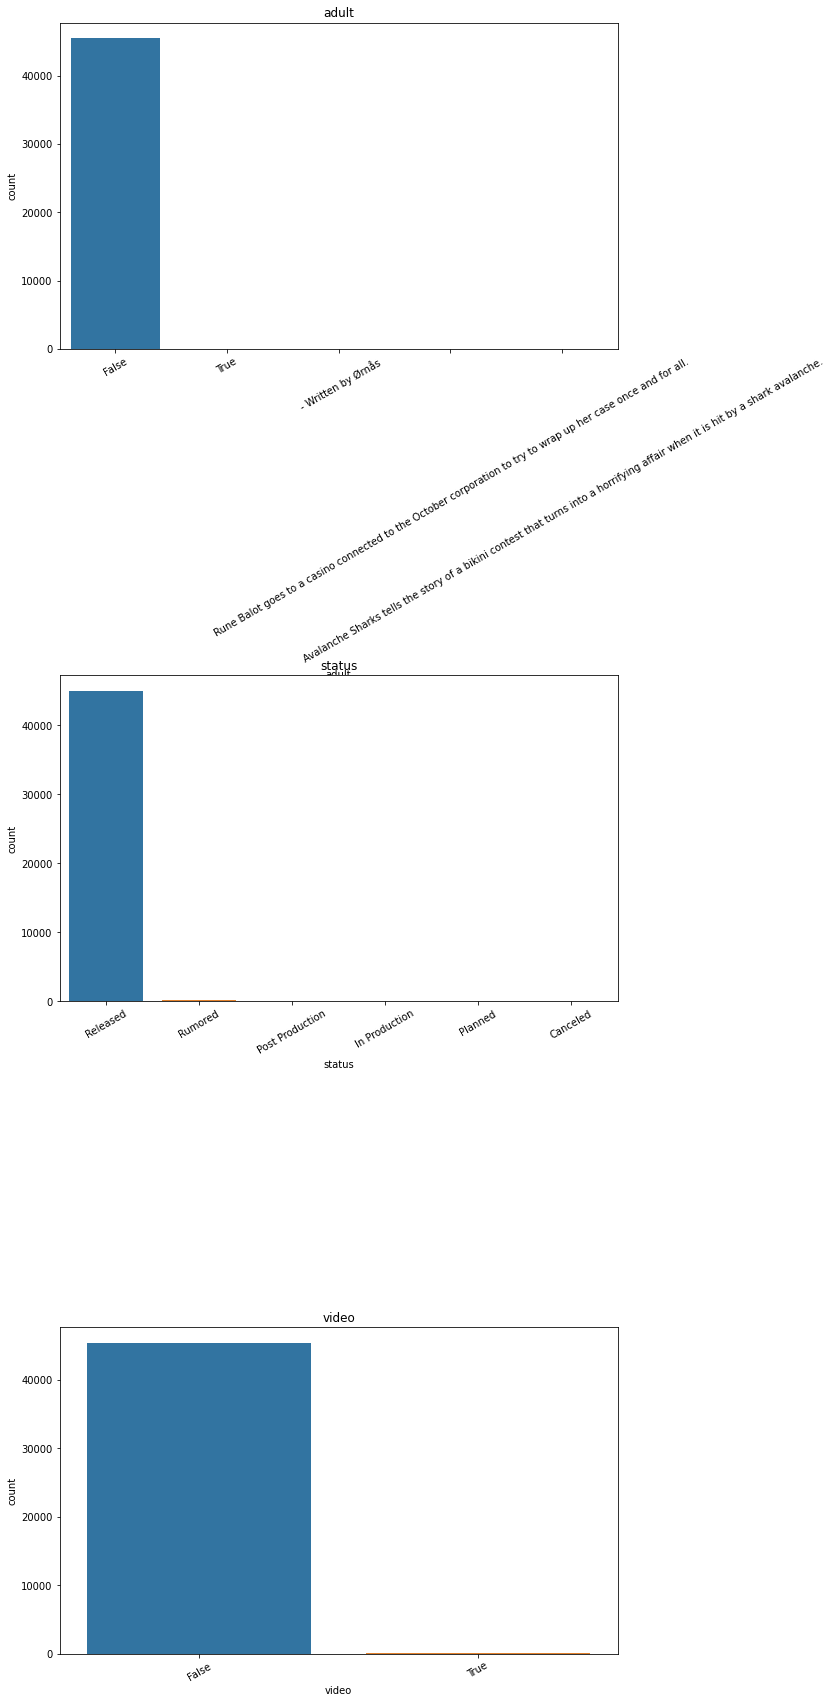

In [16]:
# Graficando algunos campos y sus categorias

columnas = ['adult', 'status', 'video']

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(10,30))
fig.subplots_adjust(hspace=1)

for i, col in enumerate(columnas):
    sns.countplot(x=col, data=df_categoricas, ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)

Se puede observar que la columna 'adult' ademas de que la mayor cantidad es 'false', y no aporta nada, los otros datos son errores, es candidata a ser eliminada la columna 'adult

- - -

Mediante el analisis visual se presentan columnas con datos formados por diccionarios y listas de diccionarios, este tipo de información se encuentra anidada o agrupada, y la información principal se encuentra en la clave 'name', por lo que, es necesario obtener el valor que viene en la clave 'name'.
Se crean 2 funciones que exploran y extraen el valor de la clave 'name, tanto para datos tipos diccionarios como listas de diccionarios.

- 1.- Valor_name_desde_dicc, esta funcion recibe (mediante aplicacion) el dataframe y la columna diccionario, retorna el valor de la clave 'name', o una cadena vacia si no cumple con la caracteristica de diccionario de python..
- 2.- Valor_name_desde_list, esta funcion recibe (mediante aplicacion) el dataframe y la columna lista de diccionario, retorna el valor de la clave 'name' o una cadena vacia si no cumple con la caracteristica de lista de diccionario.

In [128]:
# Trabajando con diccionarios
# El valor a extraer es 'name'

def Valor_name_desde_dicc(value):
    try:                                        # Captura el error que se puede producir si se pasa un tipo de datos diferente a un diccionario
        diccionario = ast.literal_eval(value)   # Se guarda el valor al ejecutar la libreria, nos permitira verificar si es un diccionario
        if isinstance(diccionario, dict):       # Se evalua si es diccionario
            return diccionario.get('name', '')  # Regresa el valor de la clave 'name'
    except (ValueError, SyntaxError):           # Si captura algun error
        pass                                    # No se muestra error
    return ''                                   # Si no es posible evaluarlo como un diccionario, devolvemos una cadena vacía

In [129]:
# Trabajando con diccionario de listas
# El valor a extraer es 'name'

def Valor_name_desde_list(value):
    try:                                        # Captura el error que se puede producir si se pasa un tipo de datos diferente a un diccionario
        lista_dicc = ast.literal_eval(value)    # Se guarda el valor al ejecutar la libreria, nos permitira verificar si es una lista de diccionario
        if isinstance(lista_dicc, list):        # Se evalua si es lista
            name = [dic.get('name','') for dic in lista_dicc if isinstance(dic, dict)]  # Regresa los valores de la clave 'name', pueden ser varios ya que es una lista de diccionarios
            return ','.join(name)               # Encadena cada uno de los valores 'name'
    except (ValueError, SyntaxError):           # Si captura algun error
        pass                                    # No se muestra error
    return ''                                   # Si no es posible evaluarlo como un diccionario, devolvemos una cadena vacía

In [19]:
# Realizando una copia del dataframe inicial para no modificar el dataframe original

df_movies_desanidado = df_movies.copy()

In [20]:
df_movies_desanidado.head().T

,0,1,2,3,4
adult,False,False,False,False,False
belongs_to_collection,"{'id': 10194, 'name': 'Toy Story Collection', ...",NaN,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",NaN,"{'id': 96871, 'name': 'Father of the Bride Col..."
budget,3e+07,6.5e+07,0,1.6e+07,0
genres,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...","[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 35, 'name': 'Comedy'}]"
homepage,http://toystory.disney.com/toy-story,NaN,NaN,NaN,NaN
id,862,8844,15602,31357,11862
imdb_id,tt0114709,tt0113497,tt0113228,tt0114885,tt0113041
original_language,en,en,en,en,en
original_title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...


**belongs_to_collection**

In [21]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a la misma columna en el dataframe.
df_movies_desanidado['d_belongs_to_collection'] = df_movies_desanidado['belongs_to_collection'].apply(Valor_name_desde_dicc)

# Mostrar el DataFrame resultante
df_movies_desanidado.drop(columns=['belongs_to_collection'], inplace=True)
df_movies_desanidado = df_movies_desanidado.rename(index=str, columns= {"d_belongs_to_collection": "belongs_to_collection"})

# Se le quita la palabra " Collection" que los valores 'belongs_to_collection' tienen en su valor
df_movies_desanidado['belongs_to_collection'] = df_movies_desanidado['belongs_to_collection'].str.replace(" Collection", "", regex=False)

# Se muestra informacion del dataframe
df_movies_desanidado['belongs_to_collection'].head().T

0              Toy Story
1                       
2         Grumpy Old Men
3                       
4    Father of the Bride
Name: belongs_to_collection, dtype: object

**genres**

In [22]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a una nueva columna en el dataframe.
df_movies_desanidado['d_genres'] = df_movies_desanidado['genres'].apply(Valor_name_desde_list)

# Mostrar el DataFrame resultante
df_movies_desanidado.drop(columns=['genres'], inplace=True)
df_movies_desanidado = df_movies_desanidado.rename(index=str, columns= {"d_genres": "genres"})
df_movies_desanidado['genres'].head().T

0     Animation,Comedy,Family
1    Adventure,Fantasy,Family
2              Romance,Comedy
3        Comedy,Drama,Romance
4                      Comedy
Name: genres, dtype: object

**production_companies**

In [23]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a una nueva columna en el dataframe.
df_movies_desanidado['d_production_companies'] = df_movies_desanidado['production_companies'].apply(Valor_name_desde_list)

# Mostrar el DataFrame resultante
df_movies_desanidado.drop(columns=['production_companies'], inplace=True)
df_movies_desanidado = df_movies_desanidado.rename(index=str, columns= {"d_production_companies": "production_companies"})
df_movies_desanidado['production_companies'].head().T

0                              Pixar Animation Studios
1    TriStar Pictures,Teitler Film,Interscope Commu...
2                          Warner Bros.,Lancaster Gate
3               Twentieth Century Fox Film Corporation
4            Sandollar Productions,Touchstone Pictures
Name: production_companies, dtype: object

**production_countries**

In [24]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a una nueva columna en el dataframe.
df_movies_desanidado['d_production_countries'] = df_movies_desanidado['production_countries'].apply(Valor_name_desde_list)

# Mostrar el DataFrame resultante
df_movies_desanidado.drop(columns=['production_countries'], inplace=True)
df_movies_desanidado = df_movies_desanidado.rename(index=str, columns= {"d_production_countries": "production_countries"})
df_movies_desanidado['production_countries'].head().T

0    United States of America
1    United States of America
2    United States of America
3    United States of America
4    United States of America
Name: production_countries, dtype: object

**spoken_languages**

In [25]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a una nueva columna en el dataframe.
df_movies_desanidado['d_spoken_languages'] = df_movies_desanidado['spoken_languages'].apply(Valor_name_desde_list)

# Mostrar el DataFrame resultante
df_movies_desanidado.drop(columns=['spoken_languages'], inplace=True)
df_movies_desanidado = df_movies_desanidado.rename(index=str, columns= {"d_spoken_languages": "spoken_languages"})
df_movies_desanidado['spoken_languages'].head().T

0             English
1    English,Français
2             English
3             English
4             English
Name: spoken_languages, dtype: object

**`Trabajando con los datos de tipo fechas`**.

**release_date**

In [26]:
# valores nulos del campo 'release_date' deben eliminarse
# Eliminando filas con datos faltantes en los campos 'release_date'

# Se muestra la cantidad de valores nulos en el campo 'release_date'
print('Cantidad de valores nulos antes de eliminar: ', df_movies_desanidado['release_date'].isnull().sum())

# Se quitan las filas que tienen valores nulos en el campo 'release_date'
df_movies_desanidado.dropna(subset=['release_date'], inplace=True)

# Se muestra la cantidad de valores nulos en el campo 'release_date'
print('Cantidad de valores nulos despues de eliminar: ', df_movies_desanidado['release_date'].isnull().sum())

Cantidad de valores nulos antes de eliminar:  87
Cantidad de valores nulos despues de eliminar:  0


In [27]:
# Se convierte la columna de tipo fecha 'release_date' en un formato de fecha 'AAAA-mm-dd'

df_movies_desanidado['release_date'] = pd.to_datetime(df_movies_desanidado['release_date'], errors='coerce').dt.strftime('%Y-%m-%d')

# Se muestra la cantidad de valores nulos en el campo 'release_date' antes de formatear la fecha
print('Cantidad de valores nulos despues de formatear la fecha: ',df_movies_desanidado['release_date'].isnull().sum())

# Se quitan las filas que tienen valores nulos en el campo 'release_date' despues de formatear la fecha
df_movies_desanidado.dropna(subset=['release_date'], inplace=True)

# Se muestra la cantidad de valores nulos en el campo 'release_date' despues de formatear la fecha
print('Cantidad de valores nulos despues de eliminar: ', df_movies_desanidado['release_date'].isnull().sum())

Cantidad de valores nulos despues de formatear la fecha:  3
Cantidad de valores nulos despues de eliminar:  0


In [28]:
# Se extrae el año del campo fecha 'release_date' creando un nuevo campo 'release_year' con el dato de año
df_movies_desanidado['release_year'] = pd.to_datetime(df_movies_desanidado['release_date'], errors='coerce').dt.year

In [29]:
df_movies_desanidado['release_year'].dtypes

dtype('int64')

In [30]:
# Se cambia el tipo de dato float64 del campo nuevo 'release_year' a un tipo de dato 'int64' para que no venga con decimal
df_movies_desanidado['release_year'] = df_movies_desanidado['release_year'].astype('int64')
df_movies_desanidado['release_year'].head(5)

0    1995
1    1995
2    1995
3    1995
4    1995
Name: release_year, dtype: int64

In [31]:
# Como se va

df_movies_desanidado.shape

(45376, 25)

**`Trabajando con calculo de inversion`**.

**return = revenue / budget**

In [32]:
# Crear la columna con el retorno de inversión, llamada return con los campos revenue y budget, 
# dividiendo estas dos últimas revenue / budget, cuando no hay datos disponibles para calcularlo, deberá tomar el valor 0
# Es importante saber si el divisor 'revenue' tiene valores 0, ya que no existe la division por 0
# Se crea una fumcion lambda, donde retorna 0 si budget es 0, de lo contrario, retorna la division de revenue / budget y crea la columna 'return'

df_movies_desanidado['return'] = df_movies_desanidado.apply(lambda x_return: 0 if x_return['budget'] == 0 else (x_return['revenue'] / x_return['budget']), axis=1)

In [33]:
# Mostrando las columnas para la division y la columna resultado
df_movies_desanidado[['revenue','budget','return']].head()

,revenue,budget,return
0,373554033.0,30000000.0,12.451801
1,262797249.0,65000000.0,4.043035
2,0.0,0.0,0.000000
3,81452156.0,16000000.0,5.090760
4,76578911.0,0.0,0.000000


**`Eliminando columnas`**.

**video, imdb_id, adult, original_title, poster_path y homepage**

In [34]:
# Eliminando las columnas: video, imdb_id, adult, original_title, poster_path y homepage

df_movies_desanidado.drop(columns=['video', 'imdb_id','adult', 'original_title', 'poster_path', 'homepage'], inplace=True)

In [35]:
# Como estan las columnas en el dataframe

df_movies_desanidado.columns

Index(['budget', 'id', 'original_language', 'overview', 'popularity',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'vote_average', 'vote_count', 'belongs_to_collection', 'genres',
       'production_companies', 'production_countries', 'spoken_languages',
       'release_year', 'return'],
      dtype='object')

In [36]:
df_movies_desanidado.head().T

,0,1,2,3,4
budget,3e+07,6.5e+07,0,1.6e+07,0
id,862,8844,15602,31357,11862
original_language,en,en,en,en,en
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
popularity,21.9469,17.0155,11.7129,3.85949,8.38752
release_date,1995-10-30,1995-12-15,1995-12-22,1995-12-22,1995-02-10
revenue,3.73554e+08,2.62797e+08,0,8.14522e+07,7.65789e+07
runtime,81,104,101,127,106
status,Released,Released,Released,Released,Released
tagline,NaN,Roll the dice and unleash the excitement!,Still Yelling. Still Fighting. Still Ready for...,Friends are the people who let you be yourself...,Just When His World Is Back To Normal... He's ...


In [37]:
# Haciendo una copia del dataframe trabajado, reordenando las columnas.
# Tratamiento y Recolección de los datos (Data Engineer stuff) ETL

df_movies_DEs = pd.DataFrame(df_movies_desanidado, 
                             columns=['id', 'title', 'genres', 'overview', 'budget', 
                                      'spoken_languages', 'original_language', 'belongs_to_collection', 'production_companies', 'production_countries', 
                                      'status', 'release_date', 'release_year', 'runtime', 'popularity', 
                                      'vote_count', 'vote_average', 'revenue', 'return', 'tagline'])

In [97]:
# Se hace un respaldo en disco de una archivo csv

ruta_archivo = "./Datasets/LARG_movies_dataset_DEs.csv"
df_movies_DEs.to_csv(ruta_archivo, sep=',')

In [98]:
# Se hace un respaldo en disco de una archivo xls

ruta_archivo = "./Datasets/LARG_movies_dataset_DEs.xls"
df_movies_DEs.to_excel(ruta_archivo)

In [38]:
df_movies_DEs.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
id,862,8844,15602,31357,11862,949,11860,45325,9091,710,9087,12110,21032,10858,1408
title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,The American President,Dracula: Dead and Loving It,Balto,Nixon,Cutthroat Island
genres,"Animation,Comedy,Family","Adventure,Fantasy,Family","Romance,Comedy","Comedy,Drama,Romance",Comedy,"Action,Crime,Drama,Thriller","Comedy,Romance","Action,Adventure,Drama,Family","Action,Adventure,Thriller","Adventure,Action,Thriller","Comedy,Drama,Romance","Comedy,Horror","Family,Animation,Adventure","History,Drama","Action,Adventure"
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...,"Obsessive master thief, Neil McCauley leads a ...",An ugly duckling having undergone a remarkable...,"A mischievous young boy, Tom Sawyer, witnesses...",International action superstar Jean Claude Van...,James Bond must unmask the mysterious head of ...,"Widowed U.S. president Andrew Shepherd, one of...",When a lawyer shows up at the vampire's doorst...,An outcast half-wolf risks his life to prevent...,An all-star cast powers this epic look at Amer...,"Morgan Adams and her slave, William Shaw, are ..."
budget,3e+07,6.5e+07,0,1.6e+07,0,6e+07,5.8e+07,0,3.5e+07,5.8e+07,6.2e+07,0,0,4.4e+07,9.8e+07
spoken_languages,English,"English,Français",English,English,English,"English,Español","Français,English","English,Deutsch",English,"English,Pусский,Español",English,"English,Deutsch",English,English,"English,Latin"
original_language,en,en,en,en,en,en,en,en,en,en,en,en,en,en,en
belongs_to_collection,Toy Story,,Grumpy Old Men,,Father of the Bride,,,,,James Bond,,,Balto,,
production_companies,Pixar Animation Studios,"TriStar Pictures,Teitler Film,Interscope Commu...","Warner Bros.,Lancaster Gate",Twentieth Century Fox Film Corporation,"Sandollar Productions,Touchstone Pictures","Regency Enterprises,Forward Pass,Warner Bros.","Paramount Pictures,Scott Rudin Productions,Mir...",Walt Disney Pictures,"Universal Pictures,Imperial Entertainment,Sign...","United Artists,Eon Productions","Columbia Pictures,Castle Rock Entertainment","Columbia Pictures,Castle Rock Entertainment,En...","Universal Pictures,Amblin Entertainment,Amblim...","Hollywood Pictures,Cinergi Pictures Entertainment","Le Studio Canal+,Laurence Mark Productions,Met..."
production_countries,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,"Germany,United States of America",United States of America,United States of America,"United Kingdom,United States of America",United States of America,"France,United States of America",United States of America,United States of America,"France,Germany,Italy,United States of America"


In [39]:
df_movies_DEs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45376 entries, 0 to 45465
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     45376 non-null  object 
 1   title                  45376 non-null  object 
 2   genres                 45376 non-null  object 
 3   overview               44435 non-null  object 
 4   budget                 45376 non-null  float64
 5   spoken_languages       45376 non-null  object 
 6   original_language      45365 non-null  object 
 7   belongs_to_collection  45376 non-null  object 
 8   production_companies   45376 non-null  object 
 9   production_countries   45376 non-null  object 
 10  status                 45296 non-null  object 
 11  release_date           45376 non-null  object 
 12  release_year           45376 non-null  int64  
 13  runtime                45376 non-null  float64
 14  popularity             45376 non-null  object 
 15  vote_co

In [40]:
# La columna 'tagline' es elegible a ser borrada

print('Total de datos del campo tagline: ', len(df_movies_DEs['tagline']))
print('Cantidad de valores nulos del campo tagline: ', df_movies_DEs['tagline'].isnull().sum())
print('Porcentaje de datos nulos: ', round(df_movies_DEs['tagline'].isnull().sum() / (len(df_movies_DEs['tagline'])) * 100, 2),'%')

Total de datos del campo tagline:  45376
Cantidad de valores nulos del campo tagline:  24978
Porcentaje de datos nulos:  55.05 %


- - -

**`Diccionario de Datos credits`**:

- Cast<br>

| Característica | Descripción | Util |
| --------- | --------- | --------- |
| cast_id	| id del personaje. | No |
| character	| Nombre del personaje | Si |
| credit_id | id de los creditos | No |
| gender | Genero | No |
| id | id del Actor | No |
| name | Nombre del actor | Si |
| order |  | No |
| profile_path | Curriculum del actor | No |

- Crew<br>

| Característica | Descripción | Util |
| --------- | --------- | --------- |
| credit_id	| id del credito. | No |
| department	| Nombre del departamento: Directing, Sound, Writing, Camera, Production | Si |
| gender | Genero | No |
| id | id del cargo | No |
| job | Nombre del cargo: Director, Original Music Composer, Screenplay, Director of Photography, Producer, Executive Producer, Writer, Costume Design, Casting | Si |
| name | Nombre del trabajor | Si |
| profile_path | Curriculum del trabajador | No |

1.- **`Se importan los datos desde el dataset: credits.csv`**.



Se trata de entender o hacerse una idea general de los datos, observando las caracteristicas especiales de cada registro del set de datos.

In [41]:
ruta_archivo_credits = "./Datasets/credits.csv"
df_credits = pd.read_csv(ruta_archivo_credits)

In [42]:
df_credits.shape

(45476, 3)

In [43]:
# Se muestra la cabecera para observar parte de los datos y las columnas

df_credits.head(2)

# Se verifica la cantidad de columnas y filas

# print(df_credits.shape)

# Se muestra la informacion de los datos que se tienen, buscando los datos que son y/o deberian ser numéricos
# y los categóricos.
# Tambien se pueden ver de la cantidad de datos, si se tienen datos nulos o vacios.

# Los datos numéricos son datos de tipo: float65, int64
# Los datos categóricos son datos de tipo: object

# print(df_credits.info())

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844


**`Información visual del set de datos:`**

- Se tiene un total de 45476 filas y 3 columnas
- cast: Se muestra como typo objeto.
- crew: Se muestra como typo objeto.
- id: Se muestra como typo int4
Se colocara el valor de 0 (cero) para los datos faltantes, nulos o vacios.
- No se tienen columnas con datos faltantes, nulos o vacios.
- Se tienen datos que estan compuestos por una lista de diccionarios, estos datos deben ser separados para su facil manipulacion:
    - cast: 
    - crew: 

2.- **`Transformaciones`**

**`Trabajando con los Datos Numéricos`**.

- id

In [44]:
# se cambian los valores NaN por 0 (cero)

df_credits['id'] = df_credits['id'].fillna(0)

**`Trabajando con los Datos Categóricos`**.

- cast: Lista de diccionario de datos, elenco.<br>
- crew: Lista de diccionario de datos, equipo.<br>

Mediante el analisis visual se presentan columnas con datos formados por listas de diccionarios, este tipo de información se encuentra anidada o agrupada.
La información que se requiere para el campo 'cast':

'character'<br>
'name'<br>

Se reutiliza ajustando la funcion: Valor_character_desde_list, esta funcion recibe (mediante aplicacion) el dataframe y la columna lista de diccionario, retorna el valor de la clave 'character' y 'name' o una cadena vacia si no cumple con la caracteristica de lista de diccionario.

La información que se requiere para el campo 'crew':

'department'<br>
'job'<br>
'name'<br>

Se reutiliza ajustando la funcion: Valor_department_desde_list y Valor_job_desde_list, esta funcion recibe (mediante aplicacion) el dataframe y la columna lista de diccionario, retorna el valor de la clave 'department', 'job' y 'name' o una cadena vacia si no cumple con la caracteristica de lista de diccionario.

In [130]:
# Trabajando con diccionario de listas
# El valor a extraer es 'character'

def Valor_character_desde_list(value):
    try:                                        # Captura el error que se puede producir si se pasa un tipo de datos diferente a un diccionario
        lista_dicc = ast.literal_eval(value)    # Se guarda el valor al ejecutar la libreria, nos permitira verificar si es una lista de diccionario
        if isinstance(lista_dicc, list):        # Se evalua si es lista
            character = [dic.get('character','') for dic in lista_dicc if isinstance(dic, dict)]  # Regresa los valores de la clave 'name', pueden ser varios ya que es una lista de diccionarios
            return ','.join(character)               # Encadena cada uno de los valores 'name'
    except (ValueError, SyntaxError):           # Si captura algun error
        pass                                    # No se muestra error
    return ''                                   # Si no es posible evaluarlo como un diccionario, devolvemos una cadena vacía

In [131]:
# Trabajando con diccionario de listas
# El valor a extraer es 'department'

def Valor_department_desde_list(value):
    try:                                        # Captura el error que se puede producir si se pasa un tipo de datos diferente a un diccionario
        lista_dicc = ast.literal_eval(value)    # Se guarda el valor al ejecutar la libreria, nos permitira verificar si es una lista de diccionario
        if isinstance(lista_dicc, list):        # Se evalua si es lista
            department = [dic.get('department','') for dic in lista_dicc if isinstance(dic, dict)]  # Regresa los valores de la clave 'name', pueden ser varios ya que es una lista de diccionarios
            return ','.join(department)               # Encadena cada uno de los valores 'name'
    except (ValueError, SyntaxError):           # Si captura algun error
        pass                                    # No se muestra error
    return ''                                   # Si no es posible evaluarlo como un diccionario, devolvemos una cadena vacía

In [132]:
# Trabajando con diccionario de listas
# El valor a extraer es 'job'

def Valor_job_desde_list(value):
    try:                                        # Captura el error que se puede producir si se pasa un tipo de datos diferente a un diccionario
        lista_dicc = ast.literal_eval(value)    # Se guarda el valor al ejecutar la libreria, nos permitira verificar si es una lista de diccionario
        if isinstance(lista_dicc, list):        # Se evalua si es lista
            job = [dic.get('job','') for dic in lista_dicc if isinstance(dic, dict)]  # Regresa los valores de la clave 'name', pueden ser varios ya que es una lista de diccionarios
            return ','.join(job)               # Encadena cada uno de los valores 'name'
    except (ValueError, SyntaxError):           # Si captura algun error
        pass                                    # No se muestra error
    return ''                                   # Si no es posible evaluarlo como un diccionario, devolvemos una cadena vacía

In [49]:
# Realizando una copia del dataframe inicial para no modificar el dataframe original

df_credits_desanidado = df_credits.copy()


**cast (elenco)**

In [50]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a la misma columna en el dataframe.
df_credits_desanidado['d_character'] = df_credits_desanidado['cast'].apply(Valor_character_desde_list)
df_credits_desanidado['d_name'] = df_credits_desanidado['cast'].apply(Valor_name_desde_list)

# df_credits_desanidado.head()
# Mostrar el DataFrame resultante
df_credits_desanidado.drop(columns=['cast'], inplace=True)
df_credits_desanidado = df_credits_desanidado.rename(index=str, columns= {"d_character": "character"})
df_credits_desanidado = df_credits_desanidado.rename(index=str, columns= {"d_name": "cast"})
df_credits_desanidado.head().T

,0,1,2,3,4
crew,"[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'credit_id': '52fe466a9251416c75077a89', 'de...","[{'credit_id': '52fe44779251416c91011acb', 'de...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."
id,862,8844,15602,31357,11862
character,"Woody (voice),Buzz Lightyear (voice),Mr. Potat...","Alan Parrish,Samuel Alan Parrish / Van Pelt,Ju...","Max Goldman,John Gustafson,Ariel Gustafson,Mar...","Savannah 'Vannah' Jackson,Bernadine 'Bernie' H...","George Banks,Nina Banks,Franck Eggelhoffer,Ann..."
cast,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...","Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...","Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ...","Whitney Houston,Angela Bassett,Loretta Devine,...","Steve Martin,Diane Keaton,Martin Short,Kimberl..."


**crew (equipo)**

'department'<br>
'job'<br>
'name'<br>

In [51]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a la misma columna en el dataframe.
df_credits_desanidado['d_department'] = df_credits_desanidado['crew'].apply(Valor_department_desde_list)
df_credits_desanidado['d_job'] = df_credits_desanidado['crew'].apply(Valor_job_desde_list)
df_credits_desanidado['d_name'] = df_credits_desanidado['crew'].apply(Valor_name_desde_list)

# df_credits_desanidado.head()
# Mostrar el DataFrame resultante
df_credits_desanidado.drop(columns=['crew'], inplace=True)
df_credits_desanidado = df_credits_desanidado.rename(index=str, columns= {"d_department": "department"})
df_credits_desanidado = df_credits_desanidado.rename(index=str, columns= {"d_job": "job"})
df_credits_desanidado = df_credits_desanidado.rename(index=str, columns= {"d_name": "crew"})
df_credits_desanidado.head().T

,0,1,2,3,4
id,862,8844,15602,31357,11862
character,"Woody (voice),Buzz Lightyear (voice),Mr. Potat...","Alan Parrish,Samuel Alan Parrish / Van Pelt,Ju...","Max Goldman,John Gustafson,Ariel Gustafson,Mar...","Savannah 'Vannah' Jackson,Bernadine 'Bernie' H...","George Banks,Nina Banks,Franck Eggelhoffer,Ann..."
cast,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...","Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra...","Walter Matthau,Jack Lemmon,Ann-Margret,Sophia ...","Whitney Houston,Angela Bassett,Loretta Devine,...","Steve Martin,Diane Keaton,Martin Short,Kimberl..."
department,"Directing,Writing,Writing,Writing,Writing,Prod...","Production,Writing,Sound,Directing,Editing,Pro...","Directing,Writing,Writing,Crew","Directing,Writing,Production,Production,Produc...","Sound,Camera,Writing,Production,Writing,Direct..."
job,"Director,Screenplay,Screenplay,Screenplay,Scre...","Executive Producer,Screenplay,Original Music C...","Director,Characters,Writer,Sound Recordist","Director,Screenplay,Producer,Producer,Producer...","Original Music Composer,Director of Photograph..."
crew,"John Lasseter,Joss Whedon,Andrew Stanton,Joel ...","Larry J. Franco,Jonathan Hensleigh,James Horne...","Howard Deutch,Mark Steven Johnson,Mark Steven ...","Forest Whitaker,Ronald Bass,Ronald Bass,Ezra S...","Alan Silvestri,Elliot Davis,Nancy Meyers,Nancy..."


In [60]:
# Se hace un respaldo en disco de un archivo csv
ruta_archivo_credits_csv = "./Datasets/LARG_credits_dataset_DEs.csv"
df_credits_desanidado.to_csv(ruta_archivo_credits_csv, sep=',')

# Se hace un respaldo en disco de una archivo xls
ruta_archivo_credits_excel = "./Datasets/LARG_credits_dataset_DEs.xls"
df_credits_desanidado.to_excel(ruta_archivo_credits_excel)

- - - 

# <h2 align=center> **APIs** </h1>

Una API (Application Programming Interface) permite que dos sistemas informáticos interactuen entre sí.

- `Protocolo de transferencia HTTP: es la forma principal de comunicar información en la web. Existen diferentes métodos, cada uno de ellos utilizados para diferentes cuestiones:`
    - GET: este método permite obtener información de la base de datos o de un proceso.
    - POST: permite mandar información, ya sea para añadir información a una base de datos o para pasar el input de un modelo de machine learning, por ejemplo.
    - PUT: permite actualizar información. Generalmente se usa para gestionar información en base de datos.
    - DELETE: este método se utiliza para eliminar información de la base de datos.
- `Url: es la dirección en la que podremos encontrar a nuestra API. Básicamente esta URL constará de tres partes:`
    - Protocolo: como toda dirección, puede ser http:// o https://
    - Dominio: el host en el que está alojado, que va desde el protocolo hasta el final del .es o .com, o la terminación que sea.
    - Endpoint: al igual que una web tiene varias páginas (/blog), (/legal), una misma API puede incluir varios puntos y que cada uno haga cosas diferentes. Al crear nuestra API en Python nosotros indicaremos los endpoints, por lo que debemos asegurarnos de que cada enpoint sea representativo de lo que haga la API que está por detrás.

3.- **`Desarrollo API`**

Se trabajara en el archivo `LARG_fastapi.py`<br>
Definiciones requeridas por la API: endpoint, método HTTP, argumentos de entrada y lo que hará la API por detrás.

- endpoints

    - 1.- def peliculas_idioma( Idioma: str ): Se ingresa un idioma (como están escritos en el dataset, no hay que traducirlos!). Debe devolver la cantidad de películas producidas en ese idioma.<br>
                    Ejemplo de retorno: X cantidad de películas fueron estrenadas en idioma

                    @app.get('/peliculas_idioma/{idioma}')
                    def peliculas_idioma(idioma:str):
                        '''Ingresas el idioma, retornando la cantidad de peliculas producidas en el mismo'''
                        return {'idioma':idioma, 'cantidad':respuesta}

    - 2.- def peliculas_duracion( Pelicula: str ): Se ingresa una pelicula. Debe devolver la duracion y el año.<br>
                    Ejemplo de retorno: X . Duración: x. Año: xx

                    @app.get('/peliculas_duracion/{pelicula}')
                    def peliculas_duracion(pelicula:str):
                        '''Ingresas la pelicula, retornando la duracion y el año'''
                        return {'pelicula':pelicula, 'duracion':respuesta, 'anio':anio}

    - 3.- def franquicia( Franquicia: str ): Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio.<br>
                    Ejemplo de retorno: La franquicia X posee X peliculas, una ganancia total de x y una ganancia promedio de xx

                    @app.get('/franquicia/{franquicia}')
                    def franquicia(franquicia:str):
                        '''Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio'''
                        return {'franquicia':franquicia, 'cantidad':respuesta, 'ganancia_total':respuesta, 'ganancia_promedio':respuesta}

    - 4.- def peliculas_pais( Pais: str ): Se ingresa un país (como están escritos en el dataset, no hay que traducirlos!), retornando la cantidad de peliculas producidas en el mismo.<br>
                    Ejemplo de retorno: Se produjeron X películas en el país X

                    @app.get('/peliculas_pais/{pais}')
                    def peliculas_pais(pais:str):
                        '''Ingresas el pais, retornando la cantidad de peliculas producidas en el mismo'''
                        return {'pais':pais, 'cantidad':respuesta}

    - 5.- def productoras_exitosas( Productora: str ): Se ingresa la productora, entregandote el revunue total y la cantidad de peliculas que realizo.<br>
                    Ejemplo de retorno: La productora X ha tenido un revenue de x

                    @app.get('/productoras_exitosas/{productora}')
                    def productoras_exitosas(productora:str):
                        '''Ingresas la productora, entregandote el revunue total y la cantidad de peliculas que realizo '''
                        return {'productora':productora, 'revenue_total': respuesta,'cantidad':respuesta}

    - 6.- def get_director( nombre_director ): Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno. Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma, en formato lista.<br>

                    @app.get('/get_director/{nombre_director}')
                    def get_director(nombre_director:str):
                        ''' Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno. 
                        Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma. En formato lista'''
                        return {'director':nombre_director, 'retorno_total_director':respuesta, 
                        'peliculas':respuesta, 'anio':respuesta,, 'retorno_pelicula':respuesta, 
                        'budget_pelicula':respuesta, 'revenue_pelicula':respuesta}

In [6]:
import pandas as pd
import numpy as np
import ast
import math

import matplotlib.pyplot as plt
import seaborn as sns

from fastapi import FastAPI
from pydantic import BaseModel
from typing import Optional

In [7]:
ruta_archivo_movies = "./Datasets/LARG_movies_dataset_DEs.csv"
df_movies_des = pd.read_csv(ruta_archivo_movies)

ruta_archivo_credits = "./Datasets/LARG_credits_dataset_DEs.csv"
df_credits_des = pd.read_csv(ruta_archivo_credits)

In [8]:
print('Datframe de movies: ', df_movies_des.shape)
print('Datframe de credits: ', df_credits_des.shape)

Datframe de movies:  (45376, 21)
Datframe de credits:  (45476, 7)


In [9]:
# Eliminando columna Unnamed: 0, de ambos datasets
df_movies_des.drop('Unnamed: 0', axis=1, inplace=True)
print(df_movies_des.columns)

# Eliminando columna Unnamed: 0, de ambos datasets
df_credits_des.drop('Unnamed: 0', axis=1, inplace=True)
print(df_credits_des.columns)

Index(['id', 'title', 'genres', 'overview', 'budget', 'spoken_languages',
       'original_language', 'belongs_to_collection', 'production_companies',
       'production_countries', 'status', 'release_date', 'release_year',
       'runtime', 'popularity', 'vote_count', 'vote_average', 'revenue',
       'return', 'tagline'],
      dtype='object')
Index(['id', 'character', 'cast', 'department', 'job', 'crew'], dtype='object')


In [5]:
pd.DataFrame(df_movies_des, columns=['title','runtime','release_year','belongs_to_collection','original_language','production_companies', 'production_countries','revenue']).head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II,Heat,Sabrina,Tom and Huck,Sudden Death,GoldenEye,The American President,Dracula: Dead and Loving It,Balto,Nixon,Cutthroat Island
runtime,81,104,101,127,106,170,127,97,106,130,106,88,78,192,119
release_year,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995,1995
belongs_to_collection,Toy Story,NaN,Grumpy Old Men,NaN,Father of the Bride,NaN,NaN,NaN,NaN,James Bond,NaN,NaN,Balto,NaN,NaN
original_language,en,en,en,en,en,en,en,en,en,en,en,en,en,en,en
production_companies,Pixar Animation Studios,"TriStar Pictures,Teitler Film,Interscope Commu...","Warner Bros.,Lancaster Gate",Twentieth Century Fox Film Corporation,"Sandollar Productions,Touchstone Pictures","Regency Enterprises,Forward Pass,Warner Bros.","Paramount Pictures,Scott Rudin Productions,Mir...",Walt Disney Pictures,"Universal Pictures,Imperial Entertainment,Sign...","United Artists,Eon Productions","Columbia Pictures,Castle Rock Entertainment","Columbia Pictures,Castle Rock Entertainment,En...","Universal Pictures,Amblin Entertainment,Amblim...","Hollywood Pictures,Cinergi Pictures Entertainment","Le Studio Canal+,Laurence Mark Productions,Met..."
production_countries,United States of America,United States of America,United States of America,United States of America,United States of America,United States of America,"Germany,United States of America",United States of America,United States of America,"United Kingdom,United States of America",United States of America,"France,United States of America",United States of America,United States of America,"France,Germany,Italy,United States of America"
revenue,3.73554e+08,2.62797e+08,0,8.14522e+07,7.65789e+07,1.87437e+08,0,0,6.43502e+07,3.52194e+08,1.07879e+08,0,1.13483e+07,1.36818e+07,1.00173e+07


- 1.- def peliculas_idioma( Idioma: str ): Se ingresa un idioma (como están escritos en el dataset, no hay que traducirlos!). Debe devolver la cantidad de películas producidas en ese idioma.

In [51]:
# Tipo de dato que debe recibir la funcion:
# idioma:str

def peliculas_idioma(idioma:str):
    try:
        valores = df_movies_des[df_movies_des['original_language'] == idioma]
        cant_peliculas = int(valores['original_language'].count())
    except (ValueError, SyntaxError):
        pass 
    return {'Idioma indicado':idioma, 'Cantidad encontrada': cant_peliculas}

In [52]:
cant_peliculas_producidas = peliculas_idioma('en')
print(cant_peliculas_producidas)

{'Idioma indicado': 'en', 'Cantidad encontrada': 32202}


- 2.-def peliculas_duracion( Pelicula: str ): Se ingresa una pelicula. Debe devolver la duracion y el año.

In [92]:
# Tipo de dato que debe recibir la funcion:
# pelicula:str
 
def pelicula_duracion_anno(pelicula: str):
    try:
        duracion_min = df_movies_des[df_movies_des['title'] == pelicula]['runtime']
        anno = df_movies_des[df_movies_des['title'] == pelicula]['release_year']
    except (ValueError, SyntaxError):
        pass 
    return {'Nombre Pelicula':pelicula, 'Duracion en minutos':duracion_min, 'Año de estreno':anno}

In [93]:
pelicula_dur_anno = pelicula_duracion_anno('Jumanji')
print(pelicula_dur_anno)

{'Nombre Pelicula': 'Jumanji', 'Duracion en minutos': 1    104.0
Name: runtime, dtype: float64, 'Año de estreno': 1    1995
Name: release_year, dtype: int64}


- 3.- def franquicia( Franquicia: str ): Se ingresa la franquicia, retornando la cantidad de peliculas, ganancia total y promedio.

In [94]:
def franquicia_cant_gana_prom_peliculas(franquicia:str):
    try:
        cantidad_peliculas = int(df_movies_des[df_movies_des['belongs_to_collection'] == franquicia]['title'].count())
        ganancia_total = float(df_movies_des[df_movies_des['belongs_to_collection'] == franquicia]['revenue'].sum())
        ganancia_promedio = 0
        if cantidad_peliculas != 0:
            ganancia_promedio = float(ganancia_total/cantidad_peliculas)
    except (ValueError, SyntaxError):
        pass 
    return {'Titulo franquicia':franquicia, 'Cantidad peliculas':cantidad_peliculas, 'Ganancia Total':ganancia_total, 'Promedio ganancia':ganancia_promedio}

In [95]:
franquicia_cant_gana_prom_peli = franquicia_cant_gana_prom_peliculas('James Bond')
print(franquicia_cant_gana_prom_peli)

{'Titulo franquicia': 'James Bond', 'Cantidad peliculas': 26, 'Ganancia Total': 7106970239.0, 'Promedio ganancia': 273345009.1923077}


- 4.- def peliculas_pais( Pais: str ): Se ingresa un país (como están escritos en el dataset, no hay que traducirlos!), retornando la cantidad de peliculas producidas en el mismo.<br>

In [96]:
def peliculas_pais(pais:str):
    try:
        cant_peliculas = int(df_movies_des[df_movies_des['production_countries'] == pais]['title'].count())
    except (ValueError, SyntaxError):
        pass 
    return {'Pais':pais, 'Cantidad de peliculas que ha producido':cant_peliculas}

In [97]:
pais_cant_peli = peliculas_pais('United Kingdom')
print(pais_cant_peli)

{'Pais': 'United Kingdom', 'Cantidad de peliculas que ha producido': 2235}


- 5.- def productoras_exitosas( Productora: str ): Se ingresa la productora, retornando el revenue total y la cantidad de peliculas que realizo.

In [98]:
def productoras_exitosas(productora:str):
    try:
        total_revenue = float(df_movies_des[df_movies_des['production_companies'] == productora]['revenue'].sum())
        cantidad_peliculas = int(df_movies_des[df_movies_des['production_companies'] == productora]['revenue'].count())
    except (ValueError, SyntaxError):
        pass 
    return {'Productora':productora, 'Total ingresos': total_revenue,'Cantidad de peliculas':cantidad_peliculas}

In [99]:
prod_ingresos_cant_peli = productoras_exitosas('Walt Disney Pictures')
print(prod_ingresos_cant_peli)

{'Productora': 'Walt Disney Pictures', 'Total ingresos': 3175301773.0, 'Cantidad de peliculas': 85}


- 6.- def get_director( nombre_director ): Se ingresa el nombre de un director que se encuentre dentro de un dataset debiendo devolver el éxito del mismo medido a través del retorno. Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, retorno individual, costo y ganancia de la misma, en formato lista.

                    @app.get('/get_director/{nombre_director}')
                    def get_director(nombre_director:str):
                        return {'director':nombre_director, 'retorno_total_director':respuesta, 
                        'peliculas':respuesta, 'anio':respuesta,, 'retorno_pelicula':respuesta, 
                        'budget_pelicula':respuesta, 'revenue_pelicula':respuesta}

- - -

Inicio - pruebas de busqueda de director

In [63]:
ruta_archivo_movies = "./Datasets/LARG_movies_dataset_DEs.csv"
df_movies_des = pd.read_csv(ruta_archivo_movies)

ruta_archivo_credits = "./Datasets/credits.csv"
df_credits_des = pd.read_csv(ruta_archivo_credits)

In [64]:
print(df_movies_des.columns)
print(df_credits_des.columns)

Index(['Unnamed: 0', 'id', 'title', 'genres', 'overview', 'budget',
       'spoken_languages', 'original_language', 'belongs_to_collection',
       'production_companies', 'production_countries', 'status',
       'release_date', 'release_year', 'runtime', 'popularity', 'vote_count',
       'vote_average', 'revenue', 'return', 'tagline'],
      dtype='object')
Index(['cast', 'crew', 'id'], dtype='object')


In [65]:
df_movies_des.drop(["Unnamed: 0"], axis=1, inplace=True)

In [117]:
print(df_movies_des.columns)

Index(['id', 'title', 'genres', 'overview', 'budget', 'spoken_languages',
       'original_language', 'belongs_to_collection', 'production_companies',
       'production_countries', 'status', 'release_date', 'release_year',
       'runtime', 'popularity', 'vote_count', 'vote_average', 'revenue',
       'return', 'tagline'],
      dtype='object')


In [10]:
df_movies_credits_merge_by_id = pd.merge(df_movies_des, df_credits_des, on='id')

In [11]:
df_movies_credits_merge_by_id.head().T

,0,1,2,3,4
id,862,8844,15602,31357,11862
title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
genres,"Animation,Comedy,Family","Adventure,Fantasy,Family","Romance,Comedy","Comedy,Drama,Romance",Comedy
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
budget,3e+07,6.5e+07,0,1.6e+07,0
spoken_languages,English,"English,Français",English,English,English
original_language,en,en,en,en,en
belongs_to_collection,Toy Story,NaN,Grumpy Old Men,NaN,Father of the Bride
production_companies,Pixar Animation Studios,"TriStar Pictures,Teitler Film,Interscope Commu...","Warner Bros.,Lancaster Gate",Twentieth Century Fox Film Corporation,"Sandollar Productions,Touchstone Pictures"
production_countries,United States of America,United States of America,United States of America,United States of America,United States of America


In [138]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a la misma columna en el dataframe.
df_movies_credits_merge_by_id['d_character'] = df_movies_credits_merge_by_id['cast'].apply(Valor_character_desde_list)
df_movies_credits_merge_by_id['d_name'] = df_movies_credits_merge_by_id['cast'].apply(Valor_name_desde_list)

# df_credits_desanidado.head()
# Mostrar el DataFrame resultante
df_movies_credits_merge_by_id.drop(columns=['cast'], inplace=True)
df_movies_credits_merge_by_id = df_movies_credits_merge_by_id.rename(index=str, columns= {"d_character": "character"})
df_movies_credits_merge_by_id = df_movies_credits_merge_by_id.rename(index=str, columns= {"d_name": "cast"})
df_movies_credits_merge_by_id.head().T

,0,1,2,3,4
id,862,8844,15602,31357,11862
title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
genres,"Animation,Comedy,Family","Adventure,Fantasy,Family","Romance,Comedy","Comedy,Drama,Romance",Comedy
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
budget,3e+07,6.5e+07,0,1.6e+07,0
spoken_languages,English,"English,Français",English,English,English
original_language,en,en,en,en,en
belongs_to_collection,Toy Story,NaN,Grumpy Old Men,NaN,Father of the Bride
production_companies,Pixar Animation Studios,"TriStar Pictures,Teitler Film,Interscope Commu...","Warner Bros.,Lancaster Gate",Twentieth Century Fox Film Corporation,"Sandollar Productions,Touchstone Pictures"
production_countries,United States of America,United States of America,United States of America,United States of America,United States of America


In [139]:
# Aplicar la función para extraer el valor que trae 'name' y se asigna a la misma columna en el dataframe.
df_movies_credits_merge_by_id['d_department'] = df_movies_credits_merge_by_id['crew'].apply(Valor_department_desde_list)
df_movies_credits_merge_by_id['d_job'] = df_movies_credits_merge_by_id['crew'].apply(Valor_job_desde_list)
df_movies_credits_merge_by_id['d_name'] = df_movies_credits_merge_by_id['crew'].apply(Valor_name_desde_list)

# df_credits_desanidado.head()
# Mostrar el DataFrame resultante
df_movies_credits_merge_by_id.drop(columns=['crew'], inplace=True)
df_movies_credits_merge_by_id = df_movies_credits_merge_by_id.rename(index=str, columns= {"d_department": "department"})
df_movies_credits_merge_by_id = df_movies_credits_merge_by_id.rename(index=str, columns= {"d_job": "job"})
df_movies_credits_merge_by_id = df_movies_credits_merge_by_id.rename(index=str, columns= {"d_name": "crew"})
df_movies_credits_merge_by_id.head().T

,0,1,2,3,4
id,862,8844,15602,31357,11862
title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
genres,"Animation,Comedy,Family","Adventure,Fantasy,Family","Romance,Comedy","Comedy,Drama,Romance",Comedy
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
budget,3e+07,6.5e+07,0,1.6e+07,0
spoken_languages,English,"English,Français",English,English,English
original_language,en,en,en,en,en
belongs_to_collection,Toy Story,NaN,Grumpy Old Men,NaN,Father of the Bride
production_companies,Pixar Animation Studios,"TriStar Pictures,Teitler Film,Interscope Commu...","Warner Bros.,Lancaster Gate",Twentieth Century Fox Film Corporation,"Sandollar Productions,Touchstone Pictures"
production_countries,United States of America,United States of America,United States of America,United States of America,United States of America


In [183]:
nombre_director = 'Forest Whitaker'

# Buscar todas las filas que contienen el nombre del director en la columna "cast"
# informacion_por_director = df_movies_credits_merge_by_id[df_movies_credits_merge_by_id['crew'].str.contains(nombre_director)]

informacion_por_credito = df_movies_credits_merge_by_id[df_movies_credits_merge_by_id['crew'].str.contains(nombre_director)]
# print(df_movies_credits_merge_by_id['crew'].str.contains(nombre_director).index)


# Buscar todas las filas que contienen el trabajo de director en la columna "crew_job"
# reduciendo_por_credito = informacion_por_director['job'].str.informacion_por_credito

# Seleccionar solo las columnas "title" y "release_year"
# retorno_informacion_por_director = informacion_por_director['title', 'release_date', 'return','budget', 'revenue']

# Convertir el DataFrame en una lista de diccionarios
# Lista_De_Dicc = PeliculasPor_TituloyAnio.to_dict('records')

# Convertir la lista de diccionarios a formato JSON
# Lista_De_Dicc_a_json = json.dumps(Lista_De_Dicc)

print(informacion_por_credito)

           id              title                       genres  \
3       31357  Waiting to Exhale         Comedy,Drama,Romance   
1785     9715        Hope Floats                Drama,Romance   
8172    13969     First Daughter  Comedy,Drama,Family,Romance   
13734   17740        Powder Blue                        Drama   
17493   59860        Monte Carlo     Adventure,Comedy,Romance   
17657   26479           Strapped                 Drama,Action   
21300  157354  Fruitvale Station                        Drama   
28421   98554       Serving Life         TV Movie,Documentary   

                                                overview      budget  \
3      Cheated on, mistreated and stepped on, the wom...  16000000.0   
1785   Birdee Pruitt has been humiliated on live tele...         0.0   
8172   Samantha MacKenzie, the daughter of the presid...  30000000.0   
13734  Several Angelenos meet on Christmas Eve throug...         0.0   
17493  Three young women vacationing in Paris find th.

Fin - pruebas de busqueda de director

- - -

Para este problema, la solución parte de unir los 2 datasets (movies y credits) en un solo dataset.

In [184]:
ruta_archivo_movies = "./Datasets/LARG_movies_dataset_DEs.csv"
df_movies_des = pd.read_csv(ruta_archivo_movies)

ruta_archivo_credits = "./Datasets/LARG_credits_dataset_DEs.csv"
df_credits_des = pd.read_csv(ruta_archivo_credits)

In [185]:
df_movies_des.drop(["Unnamed: 0"], axis=1, inplace=True)

In [186]:
df_movies_credits_concat = pd.merge(df_movies_des, df_credits_des, on='id')
# df_movies_credits_concat = pd.concat([df_movies_des, df_credits_des], axis=1)
df_movies_credits_concat.head().T

,0,1,2,3,4
id,862,8844,15602,31357,11862
title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
genres,"Animation,Comedy,Family","Adventure,Fantasy,Family","Romance,Comedy","Comedy,Drama,Romance",Comedy
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
budget,3e+07,6.5e+07,0,1.6e+07,0
spoken_languages,English,"English,Français",English,English,English
original_language,en,en,en,en,en
belongs_to_collection,Toy Story,NaN,Grumpy Old Men,NaN,Father of the Bride
production_companies,Pixar Animation Studios,"TriStar Pictures,Teitler Film,Interscope Commu...","Warner Bros.,Lancaster Gate",Twentieth Century Fox Film Corporation,"Sandollar Productions,Touchstone Pictures"
production_countries,United States of America,United States of America,United States of America,United States of America,United States of America


In [187]:
df_split_job = df_movies_credits_concat['job'].str.split(',')
df_split_crew = df_movies_credits_concat['crew'].str.split(',')

Se tienen campos con valores NaN, se cambiaran esos valores con la palabra 'Sin Informacion'

In [188]:
print('Cantidad de valores nulos del campo job: ', df_split_job.isnull().sum())
print('Cantidad de valores nulos del campo crew: ', df_split_crew.isnull().sum())
df_split_job = df_split_job.fillna('Sin Informacion')
df_split_crew = df_split_crew.fillna('Sin Informacion')
print('Cantidad de valores nulos del campo job: ', df_split_job.isnull().sum())
print('Cantidad de valores nulos del campo crew: ', df_split_crew.isnull().sum())

Cantidad de valores nulos del campo job:  723
Cantidad de valores nulos del campo crew:  723
Cantidad de valores nulos del campo job:  0
Cantidad de valores nulos del campo crew:  0


In [189]:
df_movies_credits_concat.head(5).T

,0,1,2,3,4
id,862,8844,15602,31357,11862
title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
genres,"Animation,Comedy,Family","Adventure,Fantasy,Family","Romance,Comedy","Comedy,Drama,Romance",Comedy
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
budget,3e+07,6.5e+07,0,1.6e+07,0
spoken_languages,English,"English,Français",English,English,English
original_language,en,en,en,en,en
belongs_to_collection,Toy Story,NaN,Grumpy Old Men,NaN,Father of the Bride
production_companies,Pixar Animation Studios,"TriStar Pictures,Teitler Film,Interscope Commu...","Warner Bros.,Lancaster Gate",Twentieth Century Fox Film Corporation,"Sandollar Productions,Touchstone Pictures"
production_countries,United States of America,United States of America,United States of America,United States of America,United States of America


In [190]:
# def get_director( nombre_director ): 
# Se ingresa el nombre de un director que se encuentre dentro de un dataset 
# debiendo devolver el éxito del mismo medido a través del retorno. 
# Además, deberá devolver el nombre de cada película con la fecha de lanzamiento, 
# retorno individual, costo y ganancia de la misma, en formato lista.
def get_director(director:str):
    try:
        lista = []
        for i, valor in enumerate(df_split_job):
            for j in range(len(valor)):
                if valor[j] == 'Director':
                    if (df_split_crew[i][j] == director):
                        lista.append([df_split_crew[i][j], 
                                    df_movies_credits_concat['title'][i],
                                    df_movies_credits_concat['release_date'][i],
                                    round(df_movies_credits_concat['return'][i], 2),
                                    df_movies_credits_concat['budget'][i],
                                    df_movies_credits_concat['revenue'][i]])
    except (ValueError, SyntaxError):
        pass 
    return lista

In [191]:
info_director_de_pelicula = get_director('Forest Whitaker')
print(info_director_de_pelicula)

[['Forest Whitaker', 'Waiting to Exhale', '1995-12-22', 5.09, 16000000.0, 81452156.0], ['Forest Whitaker', 'Hope Floats', '1998-05-29', 0.0, 0.0, 0.0], ['Forest Whitaker', 'First Daughter', '2004-09-24', 0.0, 30000000.0, 0.0], ['Forest Whitaker', 'Strapped', '1993-08-21', 0.0, 0.0, 0.0]]


# <h2 align=center> **EDA - Exploratory Data Analysis** </h1>

**`Análisis exploratorio de los datos`**

+ Ya los datos están limpios, ahora es tiempo de investigar las relaciones que hay entre las variables de los datasets, ver si hay outliers o anomalías (que no tienen que ser errores necesariamente)
+ Ver si hay algún patrón interesante que valga la pena explorar en un análisis posterior. Las nubes de palabras dan una buena idea de cuáles palabras son más frecuentes en los títulos, ¡podría ayudar al sistema de recomendación! 

En esta ocasión vamos a pedirte que no uses librerías para hacer EDA automático ya que queremos que pongas en practica los conceptos y tareas involucrados en el mismo.

<br/>

1.- **`Cargando los datasets`**

In [69]:
# Cargamos los 2 datasets

ruta_archivo_movies = "./Datasets/LARG_movies_dataset_DEs.csv"
df_movies_des = pd.read_csv(ruta_archivo_movies)

ruta_archivo_credits = "./Datasets/LARG_credits_dataset_DEs.csv"
df_credits_des = pd.read_csv(ruta_archivo_credits)

In [70]:
# Se eliminan columnas que no son necesarias
# print(df_movies_des.columns)
# print(df_credits_des.columns)
df_movies_des.drop(["Unnamed: 0"], axis=1, inplace=True)
df_credits_des.drop(["Unnamed: 0"], axis=1, inplace=True)
print(df_movies_des.columns)
print(df_credits_des.columns)

Index(['id', 'title', 'genres', 'overview', 'budget', 'spoken_languages',
       'original_language', 'belongs_to_collection', 'production_companies',
       'production_countries', 'status', 'release_date', 'release_year',
       'runtime', 'popularity', 'vote_count', 'vote_average', 'revenue',
       'return', 'tagline'],
      dtype='object')
Index(['id', 'character', 'cast', 'department', 'job', 'crew'], dtype='object')


In [71]:
# Se hace un merge de los dos datasets, unidos por la columna id
df_movies_credits_merge_by_id = pd.merge(df_movies_des, df_credits_des, on='id')

In [68]:
df_movies_credits_merge_by_id.head().T

,0,1,2,3,4
id,862,8844,15602,31357,11862
title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
genres,"Animation,Comedy,Family","Adventure,Fantasy,Family","Romance,Comedy","Comedy,Drama,Romance",Comedy
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
budget,3e+07,6.5e+07,0,1.6e+07,0
spoken_languages,English,"English,Français",English,English,English
original_language,en,en,en,en,en
belongs_to_collection,Toy Story,NaN,Grumpy Old Men,NaN,Father of the Bride
production_companies,Pixar Animation Studios,"TriStar Pictures,Teitler Film,Interscope Commu...","Warner Bros.,Lancaster Gate",Twentieth Century Fox Film Corporation,"Sandollar Productions,Touchstone Pictures"
production_countries,United States of America,United States of America,United States of America,United States of America,United States of America


In [72]:
# Se quitan las filas duplicadas y se crea un datasets con las columnas consideradas importantes para el ML
df_movies_credits_merge_by_id.drop_duplicates(inplace=True)
df_movies_credits_reducido = pd.DataFrame(df_movies_credits_merge_by_id, columns=['id', 'title', 'genres', 'release_year', 'popularity', 'vote_count', 'vote_average', 'overview', 'tagline'])
df_movies_credits_reducido.head().T

,0,1,2,3,4
id,862,8844,15602,31357,11862
title,Toy Story,Jumanji,Grumpier Old Men,Waiting to Exhale,Father of the Bride Part II
genres,"Animation,Comedy,Family","Adventure,Fantasy,Family","Romance,Comedy","Comedy,Drama,Romance",Comedy
release_year,1995,1995,1995,1995,1995
popularity,21.9469,17.0155,11.7129,3.85949,8.38752
vote_count,5415,2413,92,34,173
vote_average,7.7,6.9,6.5,6.1,5.7
overview,"Led by Woody, Andy's toys live happily in his ...",When siblings Judy and Peter discover an encha...,A family wedding reignites the ancient feud be...,"Cheated on, mistreated and stepped on, the wom...",Just when George Banks has recovered from his ...
tagline,NaN,Roll the dice and unleash the excitement!,Still Yelling. Still Fighting. Still Ready for...,Friends are the people who let you be yourself...,Just When His World Is Back To Normal... He's ...


In [73]:
# Se realiza una copia del dataset
df_movies_credits_reducido_limpiando = df_movies_credits_reducido.copy()

In [74]:
print('Cantidad de nulos: ', df_movies_credits_reducido_limpiando.isnull().sum())
print(f'Tamaño antes de eliminar las filas con datos nulos: {df_movies_credits_reducido_limpiando.shape}')

Cantidad de nulos:  id                  0
title               0
genres           2383
release_year        0
popularity          0
vote_count          0
vote_average        0
overview          941
tagline         24973
dtype: int64
Tamaño antes de eliminar las filas con datos nulos: (45369, 9)


In [75]:
# Eliminando las filas que contienen datos nulos en: genres, original_language, cast y crew

df_movies_credits_reducido_limpiando.dropna(subset=['overview'], inplace=True)
df_movies_credits_reducido_limpiando.dropna(subset=['tagline'], inplace=True)
df_movies_credits_reducido_limpiando.dropna(subset=['genres'], inplace=True)

In [76]:
print('Cantidad de nulos: ', df_movies_credits_reducido_limpiando.isnull().sum())
print(f'Tamaño despues de eliminar las filas con datos nulos: {df_movies_credits_reducido_limpiando.shape}')

Cantidad de nulos:  id              0
title           0
genres          0
release_year    0
popularity      0
vote_count      0
vote_average    0
overview        0
tagline         0
dtype: int64
Tamaño despues de eliminar las filas con datos nulos: (20129, 9)


2.- **`Detectando outlies o valores extremos`**

In [29]:
# Para su visualizacion se separan en 2 datasets con las variables categoricas y numericas
# Se separan en 2 dataframe nuevos, las variables categoricas.

df_categoricas_merge = df_movies_credits_reducido.select_dtypes(include=['object', 'category'])
df_numericas_merge = df_movies_credits_reducido.select_dtypes(include='number')

df_categoricas_merge.head(2).T

,0,1
title,Toy Story,Jumanji
genres,"Animation,Comedy,Family","Adventure,Fantasy,Family"
belongs_to_collection,Toy Story,NaN
original_language,en,en
cast,"Tom Hanks,Tim Allen,Don Rickles,Jim Varney,Wal...","Robin Williams,Jonathan Hyde,Kirsten Dunst,Bra..."
crew,"John Lasseter,Joss Whedon,Andrew Stanton,Joel ...","Larry J. Franco,Jonathan Hensleigh,James Horne..."


In [77]:
# Conteo de los niveles en las diferentes columnas categoricas para las que se tienen idea, por ejemplo: si es sexo deberia tener 2 categorias hombre o mujer (por ahora).
# si es estado civil puede haber soltero, casado, divorciado, otros, etc.
# Con esto podemos determinar si alguna tiene una sola cetegoria, entonces, esta columna no aportara nada.

# Si se desea en algunos datos categoricos que si tenemos idea de cuantas categorias deberia traer.
# columnas = ['adult', 'genres', 'original_language', 'spoken_languages', 'status', 'video']

for col in df_movies_credits_reducido_limpiando:
    print(f'Columna {col}: {len(df_movies_credits_reducido_limpiando[col].unique())} subniveles')

Columna id: 20120 subniveles
Columna title: 19180 subniveles
Columna genres: 2756 subniveles
Columna release_year: 108 subniveles
Columna popularity: 19966 subniveles
Columna vote_count: 1790 subniveles
Columna vote_average: 89 subniveles
Columna overview: 20112 subniveles
Columna tagline: 20004 subniveles


In [78]:
# Guardando el dataframe en un archivo .csv en disco
# El dataframe despues del EDA se llama: df_movies_credits_reducido_limpiando y
# se guardara en un archivo .csv como: LARG_movies_credits_dataset_EDA

# Se hace un respaldo en disco de un archivo csv
ruta_archivo_movies_credits_csv = "./Datasets/LARG_movies_credits_dataset_EDA.csv"
df_movies_credits_reducido_limpiando.to_csv(ruta_archivo_movies_credits_csv, sep=',')

# Se hace un respaldo en disco de una archivo xls
# ruta_archivo_credits_excel = "./Datasets/LARG_credits_dataset_DEs.xls"
# df_credits_desanidado.to_excel(ruta_archivo_credits_excel)

- - -

**`Recomendacion de peliculas Opcion 1`**

In [441]:
# Se carga el dataset despues del EDA

peliculas_original = pd.read_csv("./Datasets/LARG_movies_credits_dataset_EDA.csv")
peliculas_original.drop(["Unnamed: 0"], axis=1, inplace=True)
peliculas_original.drop(["tagline"], axis=1, inplace=True)


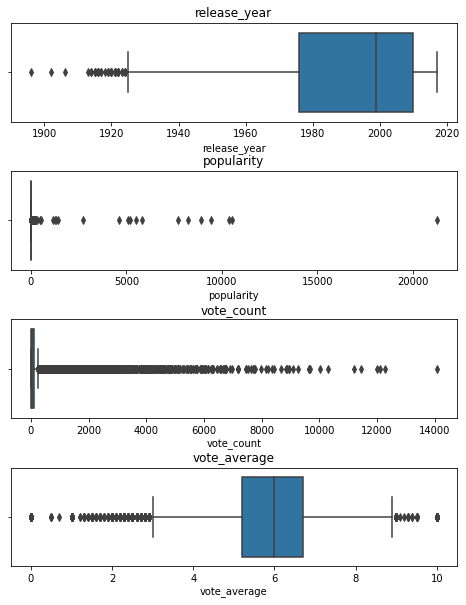

In [307]:
# Verificar si hay outlies o valores extremos, se debe decidir si se eliminan o se mantienen, 
# eso depende de lo que deseamos.
columnas_numericas = ['release_year', 'popularity', 'vote_count', 'vote_average']
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(8,10))
fig.subplots_adjust(hspace=0.5)
for i, col in enumerate(columnas_numericas):
    sns.boxplot(x=col, data=peliculas_original, ax=ax[i])
    ax[i].set_title(col)

In [442]:
# quitamos la fila con el valor de: 21259.000000 en la columna popularidad
df_movies_to_recomendar.drop_duplicates(inplace=True)
df_movies_to_recomendar.drop(df_movies_to_recomendar[df_movies_to_recomendar['popularity'] == 21259.000000].index, inplace=True)
df_movies_to_recomendar.drop(df_movies_to_recomendar[df_movies_to_recomendar['vote_count'] == 14075.000000].index, inplace=True)

In [259]:
# Matriz de correlación
correlation_matrix = moviesdataset[columnas].corr()
print(correlation_matrix)

              release_year  popularity  vote_count  vote_average
release_year      1.000000    0.175853    0.169785      0.017813
popularity        0.175853    1.000000    0.551343      0.186748
vote_count        0.169785    0.551343    1.000000      0.191216
vote_average      0.017813    0.186748    0.191216      1.000000


In [260]:
df_movies_to_recomendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20127 entries, 0 to 20128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            20127 non-null  int64  
 1   title         20127 non-null  object 
 2   genres        20127 non-null  object 
 3   release_year  20127 non-null  int64  
 4   popularity    20127 non-null  float64
 5   vote_count    20127 non-null  float64
 6   vote_average  20127 non-null  float64
 7   overview      20127 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.4+ MB


In [261]:
df_movies_to_recomendar.describe()

,id,release_year,popularity,vote_count,vote_average
count,20127.000000,20127.000000,20127.000000,20127.000000,20127.000000
mean,85289.608685,1990.953297,9.125860,220.855567,5.755468
std,103323.522008,23.086666,182.014799,708.326998,1.541107
min,5.000000,1896.000000,0.000000,0.000000,0.000000
25%,16080.500000,1976.000000,0.807315,6.000000,5.200000
50%,42418.000000,1999.000000,2.511806,22.000000,6.000000
75%,101803.500000,2010.000000,7.058954,106.000000,6.700000
max,465044.000000,2017.000000,10518.000000,12269.000000,10.000000


In [443]:
peliculas = pd.DataFrame(peliculas_original, columns=['id', 'title', 'genres'])

In [444]:
peliculas['genres'] = peliculas.genres.str.split(',')

peliculas_co = peliculas.copy()

# Se crean columnas para searar los generos utilizando One Hot Encoding

for index, row in peliculas_co.iterrows():               # Se recorre toda la matriz
    for genre in row['genres']:                                     # se buscan los generos y
        peliculas_co.at[index, genre] = 1          # se le coloca 1 al genero encontrado

peliculas_co = peliculas_co.fillna(0)       # En la columna que no tiene nada en el genero, se le coloca 0
print('Peliculas codificadas: ', peliculas_co)

Peliculas codificadas:             id                             title  \
0        8844                           Jumanji   
1       15602                  Grumpier Old Men   
2       31357                 Waiting to Exhale   
3       11862       Father of the Bride Part II   
4         949                              Heat   
...       ...                               ...   
20124   14885  Pooh's Heffalump Halloween Movie   
20125  420346                 The Morning After   
20126   84419                  House of Horrors   
20127  289923               The Burkittsville 7   
20128   67758                          Betrayal   

                                 genres  Adventure  Fantasy  Family  Romance  \
0          [Adventure, Fantasy, Family]        1.0      1.0     1.0      0.0   
1                     [Romance, Comedy]        0.0      0.0     0.0      1.0   
2              [Comedy, Drama, Romance]        0.0      0.0     0.0      1.0   
3                              [Comedy]    

In [445]:
# rating
popularity = pd.DataFrame(peliculas_original, columns=['id', 'popularity'])
dicc_popularity = popularity.to_dict()
rating = pd.DataFrame(dicc_popularity)
print(rating)

           id  popularity
0        8844   17.015539
1       15602   11.712900
2       31357    3.859495
3       11862    8.387519
4         949   17.924927
...       ...         ...
20124   14885    2.568495
20125  420346    0.139936
20126   84419    0.222814
20127  289923    0.386450
20128   67758    0.903007

[20129 rows x 2 columns]


In [449]:
# perfil con vote_average
vote_average = pd.DataFrame(peliculas_original, columns=['id', 'title', 'vote_average'])
dicc_vote_average = vote_average.to_dict()
entrada_peli = pd.DataFrame(dicc_vote_average)
print(entrada_peli)

           id                             title  vote_average
0        8844                           Jumanji           6.9
1       15602                  Grumpier Old Men           6.5
2       31357                 Waiting to Exhale           6.1
3       11862       Father of the Bride Part II           5.7
4         949                              Heat           7.7
...       ...                               ...           ...
20124   14885  Pooh's Heffalump Halloween Movie           5.4
20125  420346                 The Morning After           4.0
20126   84419                  House of Horrors           6.3
20127  289923               The Burkittsville 7           7.0
20128   67758                          Betrayal           3.8

[20129 rows x 3 columns]


In [450]:
# perfil con vote_count
vote_count = pd.DataFrame(peliculas_original, columns=['id', 'title', 'vote_count'])
dicc_vote_count = vote_count.to_dict()
df_vote_count = pd.DataFrame(dicc_vote_count)
print(df_vote_count)

           id                             title  vote_count
0        8844                           Jumanji      2413.0
1       15602                  Grumpier Old Men        92.0
2       31357                 Waiting to Exhale        34.0
3       11862       Father of the Bride Part II       173.0
4         949                              Heat      1886.0
...       ...                               ...         ...
20124   14885  Pooh's Heffalump Halloween Movie         7.0
20125  420346                 The Morning After         2.0
20126   84419                  House of Horrors         8.0
20127  289923               The Burkittsville 7         1.0
20128   67758                          Betrayal         6.0

[20129 rows x 3 columns]


In [439]:
# Id = peliculas[peliculas['title'].isin(entrada_peli['title'].tolist())]
# entrada_peli = pd.merge(Id, entrada_peli)

In [451]:
entrada_peli

,id,title,vote_average
0,8844,Jumanji,6.9
1,15602,Grumpier Old Men,6.5
2,31357,Waiting to Exhale,6.1
3,11862,Father of the Bride Part II,5.7
4,949,Heat,7.7
...,...,...,...
20124,14885,Pooh's Heffalump Halloween Movie,5.4
20125,420346,The Morning After,4.0
20126,84419,House of Horrors,6.3
20127,289923,The Burkittsville 7,7.0


In [400]:
# entrada_peli = entrada_peli.drop('genres', 1)

In [452]:
entrada_peli.head()

,id,title,vote_average
0,8844,Jumanji,6.9
1,15602,Grumpier Old Men,6.5
2,31357,Waiting to Exhale,6.1
3,11862,Father of the Bride Part II,5.7
4,949,Heat,7.7


In [453]:
peli_usuario = peliculas_co[peliculas_co['id'].isin(entrada_peli['id'].tolist())]
print('Peliculas Usuario Codificadas: ',peli_usuario)

Peliculas Usuario Codificadas:             id                             title  \
0        8844                           Jumanji   
1       15602                  Grumpier Old Men   
2       31357                 Waiting to Exhale   
3       11862       Father of the Bride Part II   
4         949                              Heat   
...       ...                               ...   
20124   14885  Pooh's Heffalump Halloween Movie   
20125  420346                 The Morning After   
20126   84419                  House of Horrors   
20127  289923               The Burkittsville 7   
20128   67758                          Betrayal   

                                 genres  Adventure  Fantasy  Family  Romance  \
0          [Adventure, Fantasy, Family]        1.0      1.0     1.0      0.0   
1                     [Romance, Comedy]        0.0      0.0     0.0      1.0   
2              [Comedy, Drama, Romance]        0.0      0.0     0.0      1.0   
3                              [Com

In [454]:
peli_usuario.columns

Index(['id', 'title', 'genres', 'Adventure', 'Fantasy', 'Family', 'Romance',
       'Comedy', 'Drama', 'Action', 'Crime', 'Thriller', 'Animation',
       'History', 'Science Fiction', 'Mystery', 'War', 'Music', 'Horror',
       'Documentary', 'Foreign', 'Western', 'TV Movie'],
      dtype='object')

In [464]:
peli_usuario = peli_usuario.reset_index(drop=True)
tabla_generos = peli_usuario.drop('id', 1).drop('title', 1).drop('genres', 1)
print('Tabla de generos: ', tabla_generos)

Tabla de generos:         Adventure  Fantasy  Family  Romance  Comedy  Drama  Action  Crime  \
0            1.0      1.0     1.0      0.0     0.0    0.0     0.0    0.0   
1            0.0      0.0     0.0      1.0     1.0    0.0     0.0    0.0   
2            0.0      0.0     0.0      1.0     1.0    1.0     0.0    0.0   
3            0.0      0.0     0.0      0.0     1.0    0.0     0.0    0.0   
4            0.0      0.0     0.0      0.0     0.0    1.0     1.0    1.0   
...          ...      ...     ...      ...     ...    ...     ...    ...   
20124        0.0      0.0     1.0      0.0     0.0    0.0     0.0    0.0   
20125        0.0      0.0     0.0      0.0     1.0    1.0     0.0    0.0   
20126        0.0      0.0     0.0      0.0     0.0    0.0     0.0    0.0   
20127        0.0      0.0     0.0      0.0     0.0    0.0     0.0    0.0   
20128        0.0      0.0     0.0      0.0     0.0    1.0     1.0    0.0   

       Thriller  Animation  History  Science Fiction  Mystery  War  

In [465]:
perfil_usu = tabla_generos.transpose().dot(entrada_peli['vote_average'])
print('Categoria que el usuario prefiere: ', perfil_usu)

Categoria que el usuario prefiere:  Adventure          12279.7
Fantasy             7395.5
Family              8537.8
Romance            20086.1
Comedy             35870.5
Drama              54257.6
Action             21857.2
Crime              15546.4
Thriller           27141.5
Animation           4600.7
History             3863.3
Science Fiction    10714.4
Mystery             8390.6
War                 4006.9
Music               5042.4
Horror             16724.7
Documentary         7096.1
Foreign             1786.3
Western             3638.2
TV Movie            1132.6
dtype: float64


In [466]:
generos = peliculas_co.set_index(peliculas_co['id'])

In [467]:
generos = generos.drop('id', 1).drop('title', 1).drop('genres', 1)
print('Generos: ', generos.head())

Generos:         Adventure  Fantasy  Family  Romance  Comedy  Drama  Action  Crime  \
id                                                                         
8844         1.0      1.0     1.0      0.0     0.0    0.0     0.0    0.0   
15602        0.0      0.0     0.0      1.0     1.0    0.0     0.0    0.0   
31357        0.0      0.0     0.0      1.0     1.0    1.0     0.0    0.0   
11862        0.0      0.0     0.0      0.0     1.0    0.0     0.0    0.0   
949          0.0      0.0     0.0      0.0     0.0    1.0     1.0    1.0   

       Thriller  Animation  History  Science Fiction  Mystery  War  Music  \
id                                                                          
8844        0.0        0.0      0.0              0.0      0.0  0.0    0.0   
15602       0.0        0.0      0.0              0.0      0.0  0.0    0.0   
31357       0.0        0.0      0.0              0.0      0.0  0.0    0.0   
11862       0.0        0.0      0.0              0.0      0.0  0.0    0.

In [468]:
recom = ((generos*perfil_usu).sum(axis=1))/(perfil_usu.sum())
print('Recomendaciones: ', recom.head())

Recomendaciones:  id
8844     0.104505
15602    0.207271
31357    0.408248
11862    0.132869
949      0.440061
dtype: float64


In [469]:
recom = recom.sort_values(ascending=False)
print('Recomendaciones: ', recom.head())

Recomendaciones:  id
325712    0.650627
35176     0.647332
62399     0.647332
10856     0.629434
71714     0.618473
dtype: float64


In [471]:
final = peliculas.loc[peliculas['id'].isin(recom.head(5).keys())]
nfinal = final[['title']]
print('Nombres peliculas recomendadas: ', nfinal)

Nombres peliculas recomendadas:                           title
3464             Kill Me Later
4281                   Intacto
4680              Luc�a, Luc�a
17510  Cool Cat Saves the Kids
19742     Under New Management


- - -

**`Recomendacion de Peliculas Opcion 2`**

In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import matplotlib.pyplot as plt

In [3]:
# Se carga el dataset despues del EDA

df_movies_to_recomendar = pd.read_csv("./Datasets/LARG_movies_credits_dataset_EDA.csv")

In [5]:
# Nube de palabras para los títulos de películas utilizando TextBlob
titles_blob = TextBlob(' '.join(df_movies_to_recomendar['title']))
title_frequencies = titles_blob.word_counts

title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(title_frequencies)

plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**********************************************************************
  Resource punkt not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt/PY3/english.pickle

  Searched in:
    - '/home/ramirezla/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
    - ''
**********************************************************************

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.


MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [117]:
df_movies_to_recomendar.head()

,Unnamed: 0,id,title,genres,release_year,popularity,vote_count,vote_average,overview,tagline
0,1,8844,Jumanji,"Adventure,Fantasy,Family",1995,17.015539,2413.0,6.9,When siblings Judy and Peter discover an encha...,Roll the dice and unleash the excitement!
1,2,15602,Grumpier Old Men,"Romance,Comedy",1995,11.712900,92.0,6.5,A family wedding reignites the ancient feud be...,Still Yelling. Still Fighting. Still Ready for...
2,3,31357,Waiting to Exhale,"Comedy,Drama,Romance",1995,3.859495,34.0,6.1,"Cheated on, mistreated and stepped on, the wom...",Friends are the people who let you be yourself...
3,4,11862,Father of the Bride Part II,Comedy,1995,8.387519,173.0,5.7,Just when George Banks has recovered from his ...,Just When His World Is Back To Normal... He's ...
4,5,949,Heat,"Action,Crime,Drama,Thriller",1995,17.924927,1886.0,7.7,"Obsessive master thief, Neil McCauley leads a ...",A Los Angeles Crime Saga


In [128]:
df_movies_to_recomendar.drop(["Unnamed: 0"], axis=1, inplace=True)
df_movies_to_recomendar.drop(["tagline"], axis=1, inplace=True)

In [119]:
df_movies_to_recomendar.columns

Index(['id', 'title', 'genres', 'release_year', 'popularity', 'vote_count',
       'vote_average', 'overview'],
      dtype='object')

In [120]:
df_movies_to_recomendar.describe()

,id,release_year,popularity,vote_count,vote_average
count,20129.000000,20129.000000,20129.000000,20129.000000,20129.000000
mean,85283.505639,1990.955189,10.182537,221.676685,5.755611
std,103320.207984,23.086300,235.710154,715.239626,1.541124
min,5.000000,1896.000000,0.000000,0.000000,0.000000
25%,16081.000000,1976.000000,0.807369,6.000000,5.200000
50%,42413.000000,1999.000000,2.512247,22.000000,6.000000
75%,101801.000000,2010.000000,7.060880,106.000000,6.700000
max,465044.000000,2017.000000,21259.000000,14075.000000,10.000000


array([[<AxesSubplot:title={'center':'release_year'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'vote_count'}>,
        <AxesSubplot:title={'center':'vote_average'}>]], dtype=object)

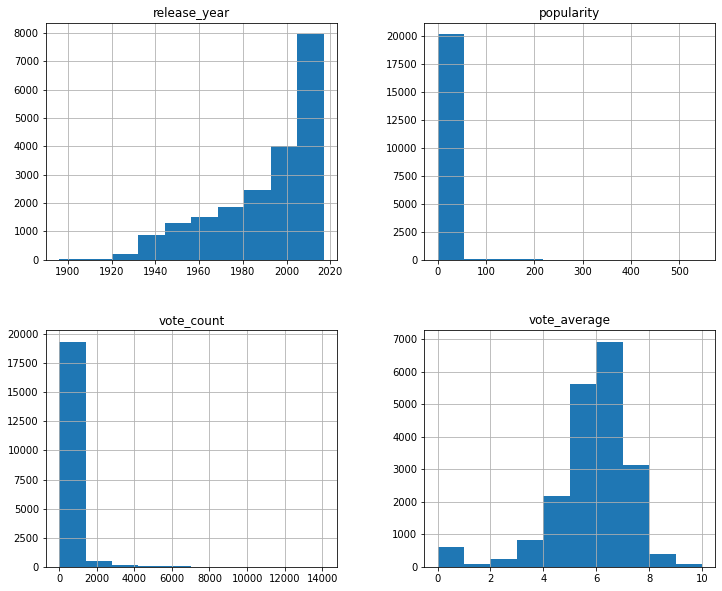

In [86]:
# Distribuciones de variables numéricas
columnas = ['release_year', 'popularity', 'vote_count', 'vote_average']
df_movies_to_recomendar[columnas].hist(figsize=(12, 10))

In [87]:
# Matriz de correlación
correlation_matrix = moviesdataset[columnas].corr()
print(correlation_matrix)

              release_year  popularity  vote_count  vote_average
release_year      1.000000    0.175853    0.169785      0.017813
popularity        0.175853    1.000000    0.551343      0.186748
vote_count        0.169785    0.551343    1.000000      0.191216
vote_average      0.017813    0.186748    0.191216      1.000000


In [121]:
df_movies_to_recomendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20129 entries, 0 to 20128
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            20129 non-null  int64  
 1   title         20129 non-null  object 
 2   genres        20129 non-null  object 
 3   release_year  20129 non-null  int64  
 4   popularity    20129 non-null  float64
 5   vote_count    20129 non-null  float64
 6   vote_average  20129 non-null  float64
 7   overview      20129 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.2+ MB


In [141]:
import pandas as pd
import chardet

with open('./Datasets/LARG_movies_credits_dataset_EDA.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
df_movies_to_recomendar = pd.read_csv('./Datasets/LARG_movies_credits_dataset_EDA.csv', encoding=result['encoding'])

In [134]:
# Se carga el dataset despues del EDA

df_movies_to_recomendar = pd.read_csv("./Datasets/LARG_movies_credits_dataset_EDA.csv")

In [143]:
df_movies_to_recomendar.drop(["Unnamed: 0"], axis=1, inplace=True)
df_movies_to_recomendar.drop(["tagline"], axis=1, inplace=True)

In [144]:
# Nube de palabras para los títulos de películas
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [145]:
df_movies_to_recomendar.columns

Index(['id', 'title', 'genres', 'release_year', 'popularity', 'vote_count',
       'vote_average', 'overview'],
      dtype='object')

In [147]:
# Eliminando caracteres que no son truetype.

df_movies_to_recomendar['title'] = df_movies_to_recomendar['title'].str.replace('[^\\x00-\\x7F]+', '', regex=True)
df_movies_to_recomendar['genres'] = df_movies_to_recomendar['genres'].str.replace('[^\\x00-\\x7F]+', '', regex=True)
df_movies_to_recomendar['overview'] = df_movies_to_recomendar['overview'].str.replace('[^\\x00-\\x7F]+', '', regex=True)

In [148]:
df_movies_to_recomendar_reducido = pd.DataFrame(df_movies_to_recomendar, columns=['id', 'title', 'overview'])

In [149]:
font_path = './font/arial.ttf'
title_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_movies_to_recomendar_reducido['title']))
plt.figure(figsize=(10, 5))
plt.imshow(title_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts

- - -